## Business case: Based on the given features predict the price range of the cellphone

Mobile phones have become a necessity in these days for everyone. We need a cellphone to do some or the other task in our daily life. Most of us would want a phone that has more features with lesser price. In today's world, the business of cellphones is very competitive, so we need to understand the factors that drive the sales of cellphones. 
The objective is to find relation between some features such as RAM, internal memory, camera, etc. and its selling price. We need to build a model that classifies the price range of cellphones based on some specifications.
Based of the features, price is divided into 4 ranges as mentioned below.

Price range:

0 - low cost 1 - medium cost 2 - high cost 3 - very high cost

Aim is to predict the price range based on the given features

### Understand the data

- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth or not
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support or not
- fc - Front Camera mega pixels
- four_g - Has 4G or not
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last when you are
- three_g - Has 3G or not
- touch_screen - Has touch screen or not
- wifi - Has wifi or not
- price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("cellphone.csv")

In [3]:
pd.set_option("display.max_columns",50)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.shape

(2000, 21)

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Exploratory Data Analysis

## Univaraite Analysis

In [12]:
! pip install sweetviz

In [13]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Battery range varies from 501 mAh to 1998 mAh
- Almost 50% of the cellphones have bluetooth
- Clock speed for most of the cellphones is at 0.5 with 3.0 being the highest clock speed
- 51% of the cellphones have dual sim
- Almost 48% of the cellphones have front camera with less than 6 MP and 24% of cellphones do not have front camera
- 52% of the cellphone have 4G
- Internal memory ranges from 2Gb to 64GB
- The thinnest cellphone has depth of 0.1 cm with 1 cm being the thickest mobile depth
- Most of the cellphones have average weight of 140 gms with 80 gms being the lightest and 200gms being the heaviest cellphone
- The number of cores for a cellphone range from 1 to 8
- 5% of the cellphones do not have primary camera wheras others have 1MP to 20MP as primary camera
- RAM for the cellphone ranges from 256MB to 3998MB
- Screen height ranges from 5cm to 19cm and width ranges from 0 to 18cm
- 2hrs is the minimum talk time for a cellphone with 20 hrs being highest talktime for a single battery charge
- 76% of the cellphones are 3G enabled
- Half of the cellphone models are touch screen
- 51% of the cellphones have wifi support

#  Exploratory Data Analysis (EDA)

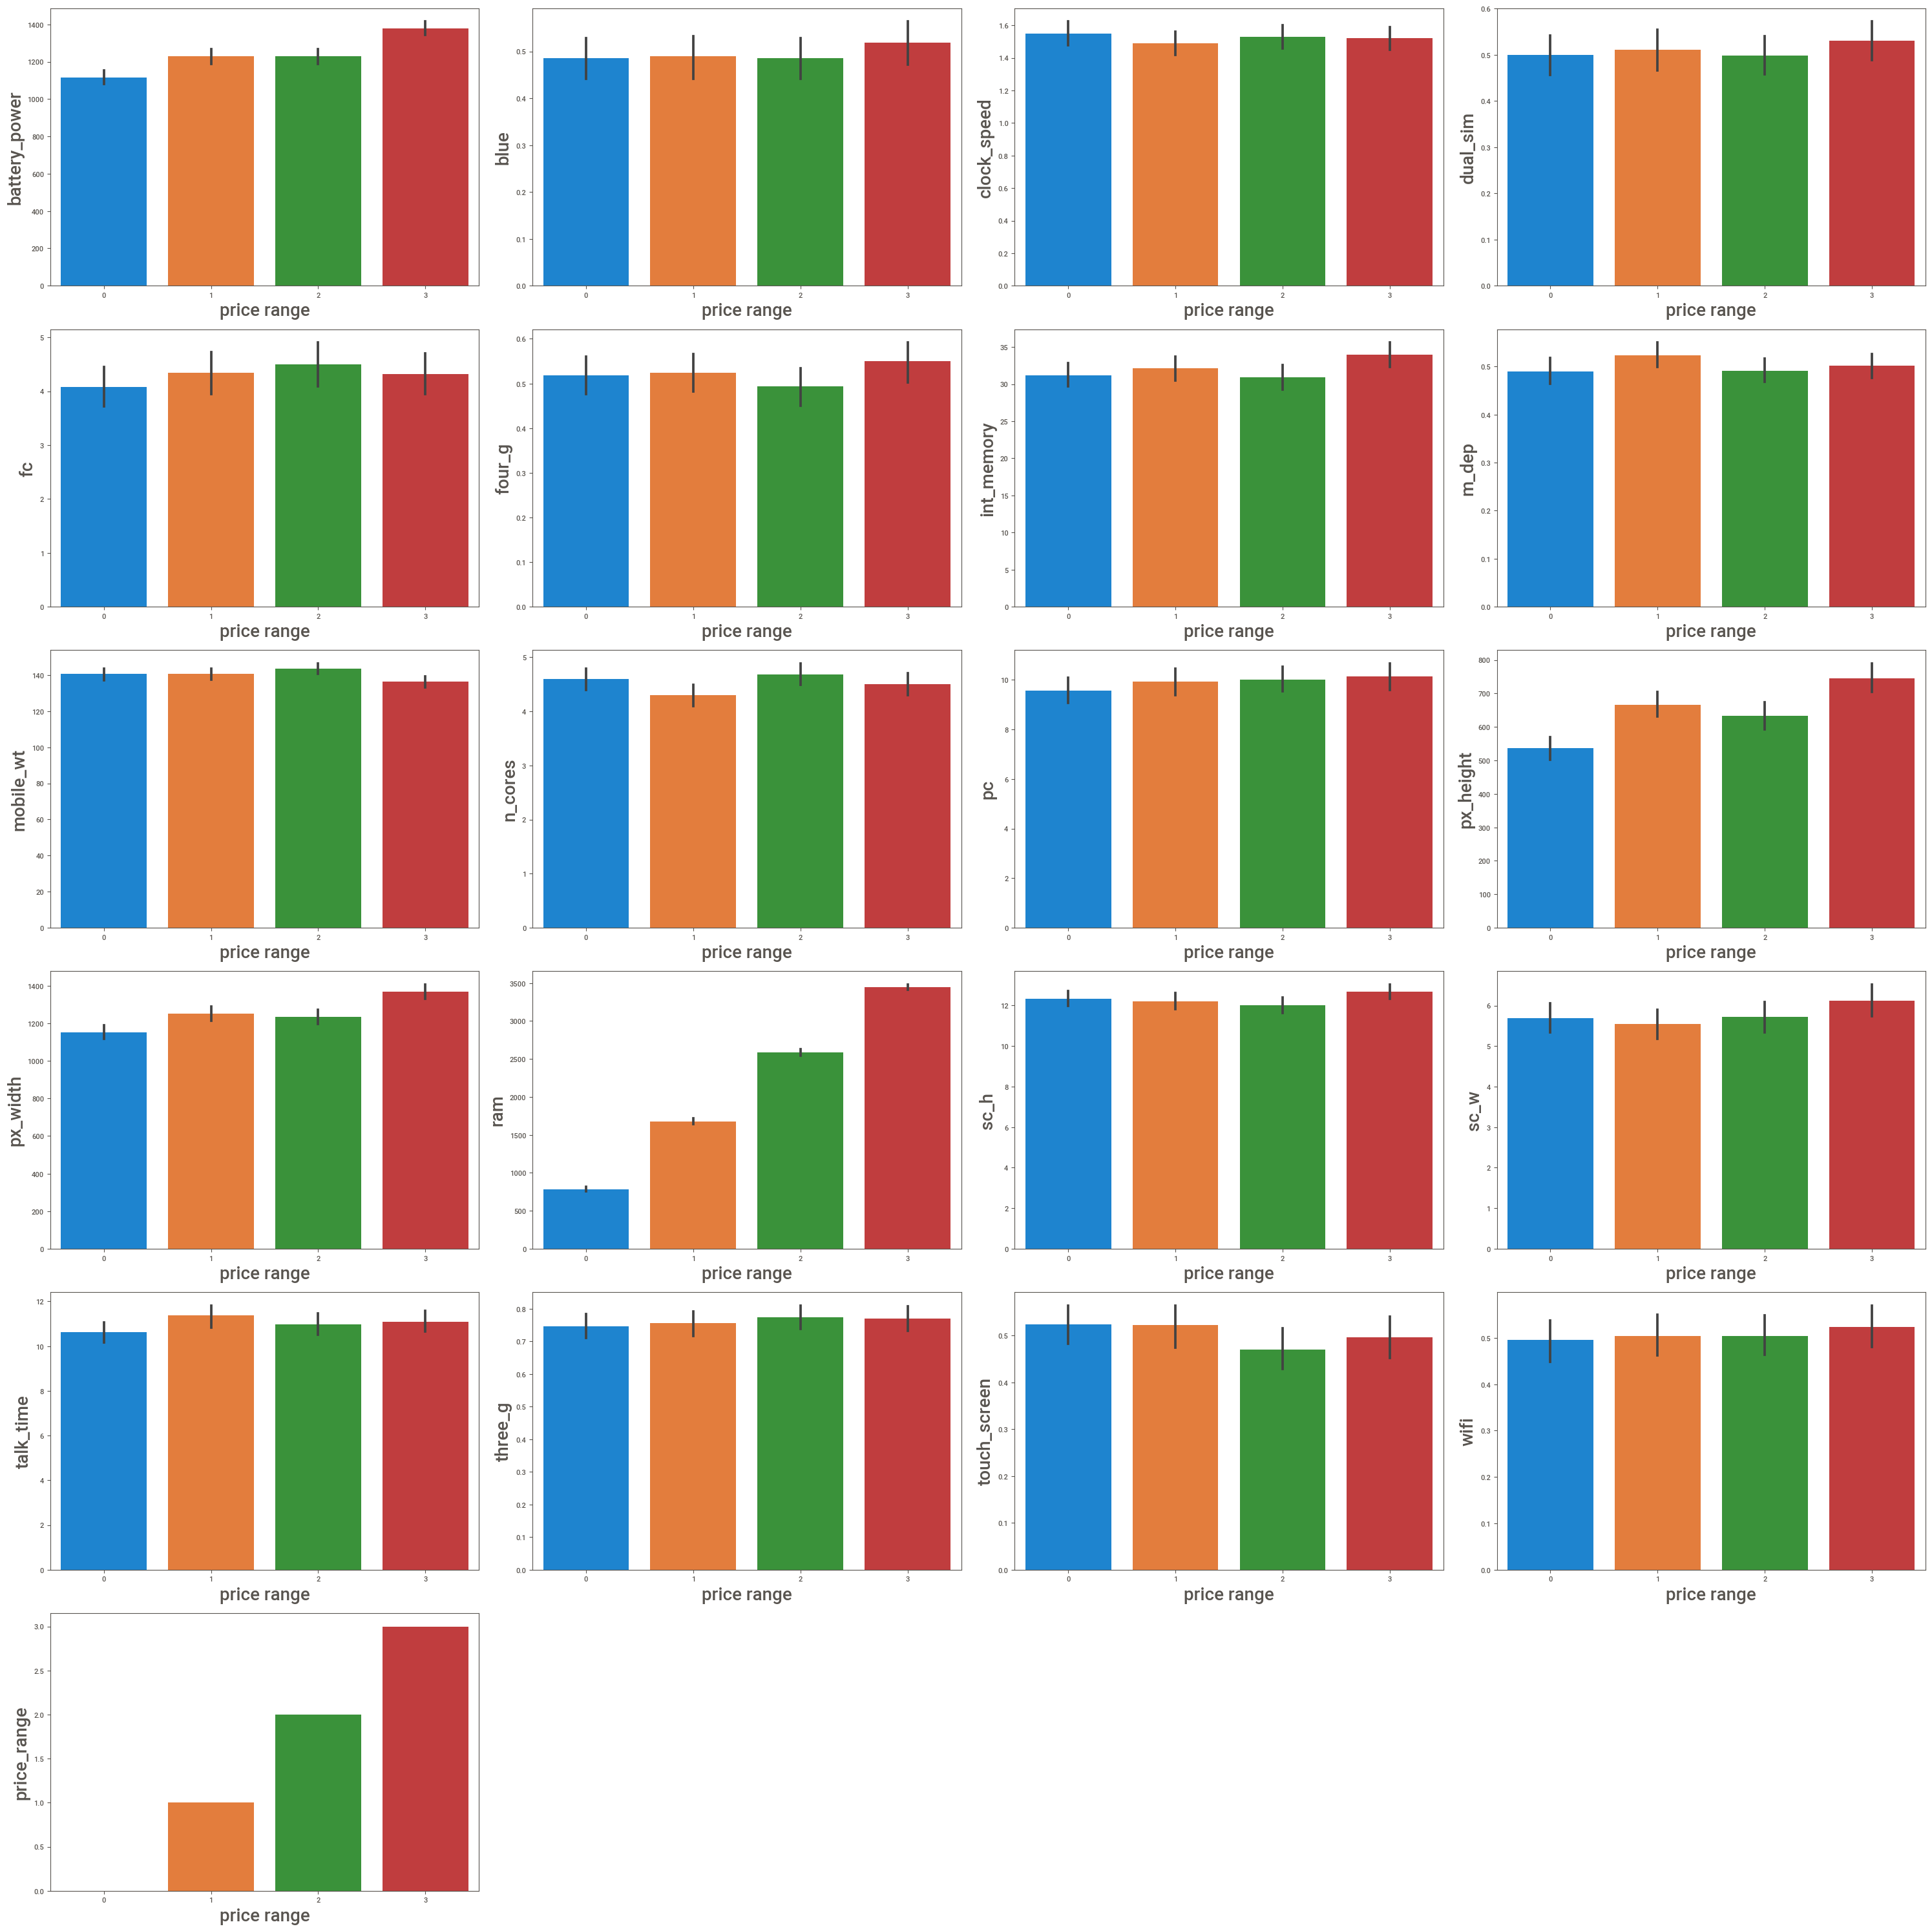

In [14]:
# biveriyat analysis using barplot
plt.figure(figsize=(30,30),facecolor='white')
num = 1
for columns in df:
    if(num <= 21):
        ax=plt.subplot(6,4,num)
        sns.barplot(x = df.price_range,y = df[columns])
        plt.xlabel("price range",fontsize = 20)
        plt.ylabel(columns,fontsize = 20)
                    
    
    num+=1
plt.tight_layout()

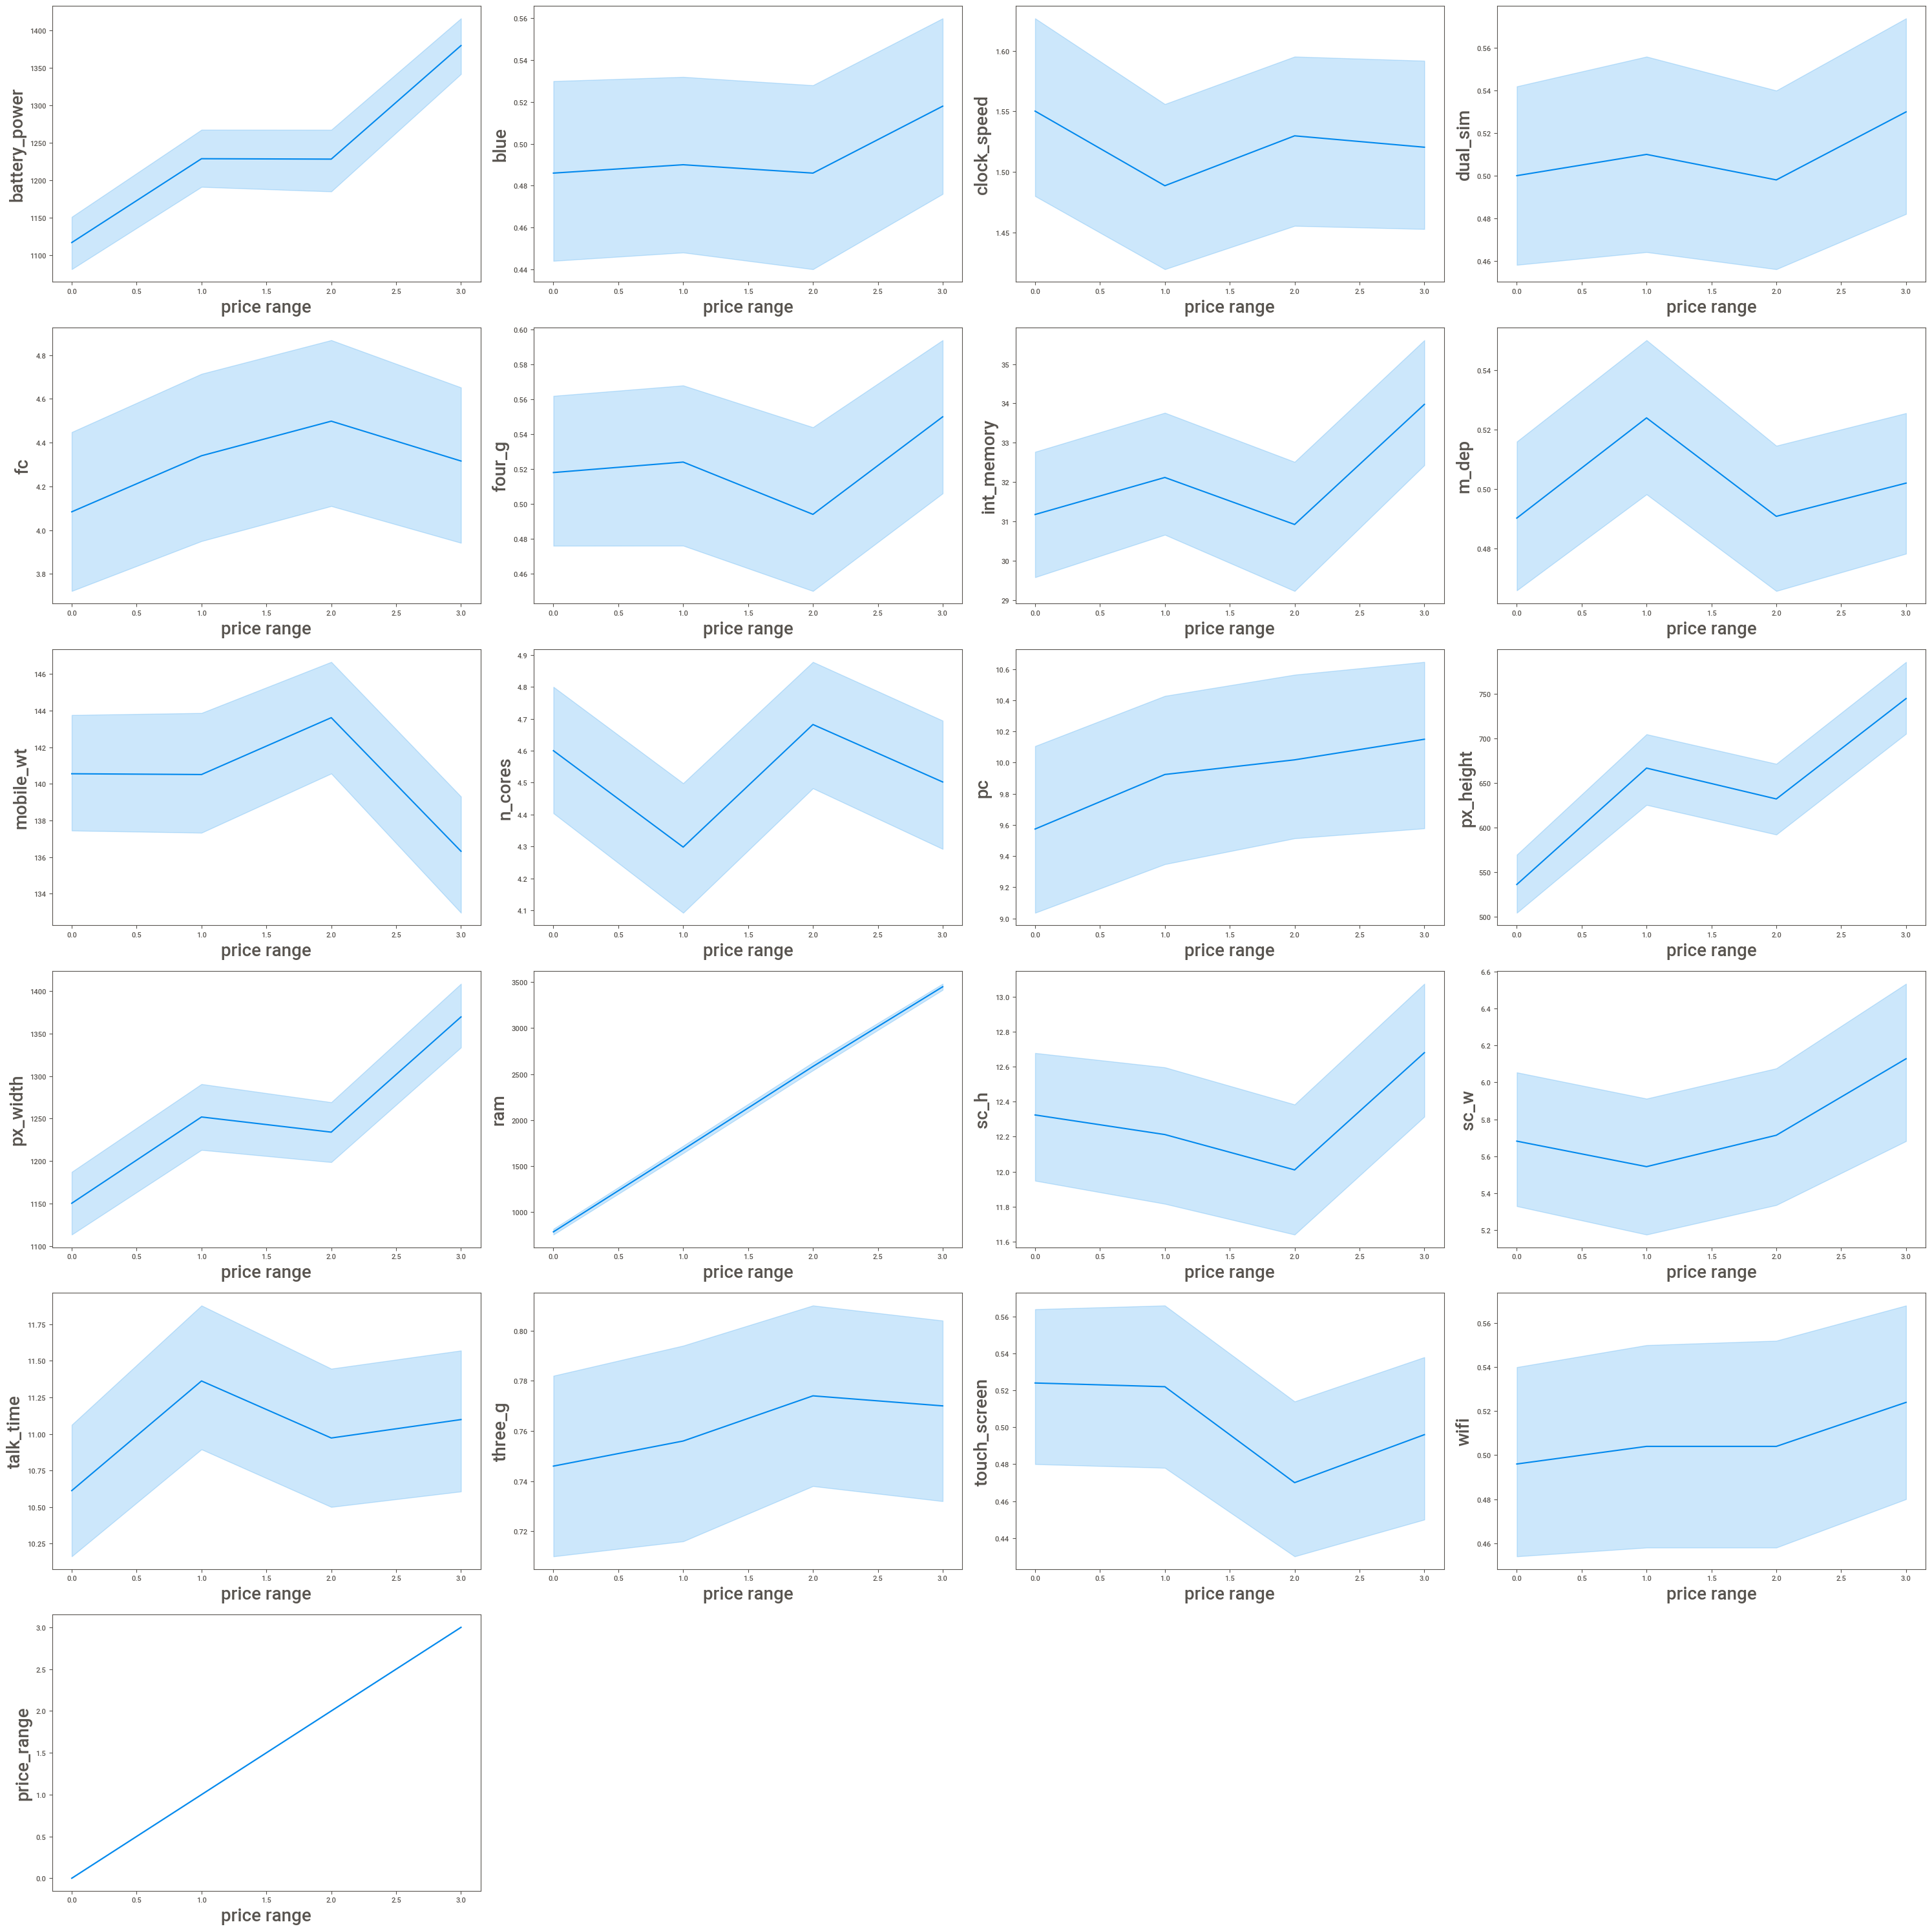

In [15]:
# biveriate analysis using linplot 
plt.figure(figsize=(30,30),facecolor="white")
num = 1
for columns in df:
    if num <=21:
        ax = plt.subplot(6,4,num)
        sns.lineplot(x = df.price_range,y = df[columns])
        plt.ylabel(columns,fontsize=20)
        plt.xlabel("price range",fontsize = 20)
        
    num+=1
plt.tight_layout()

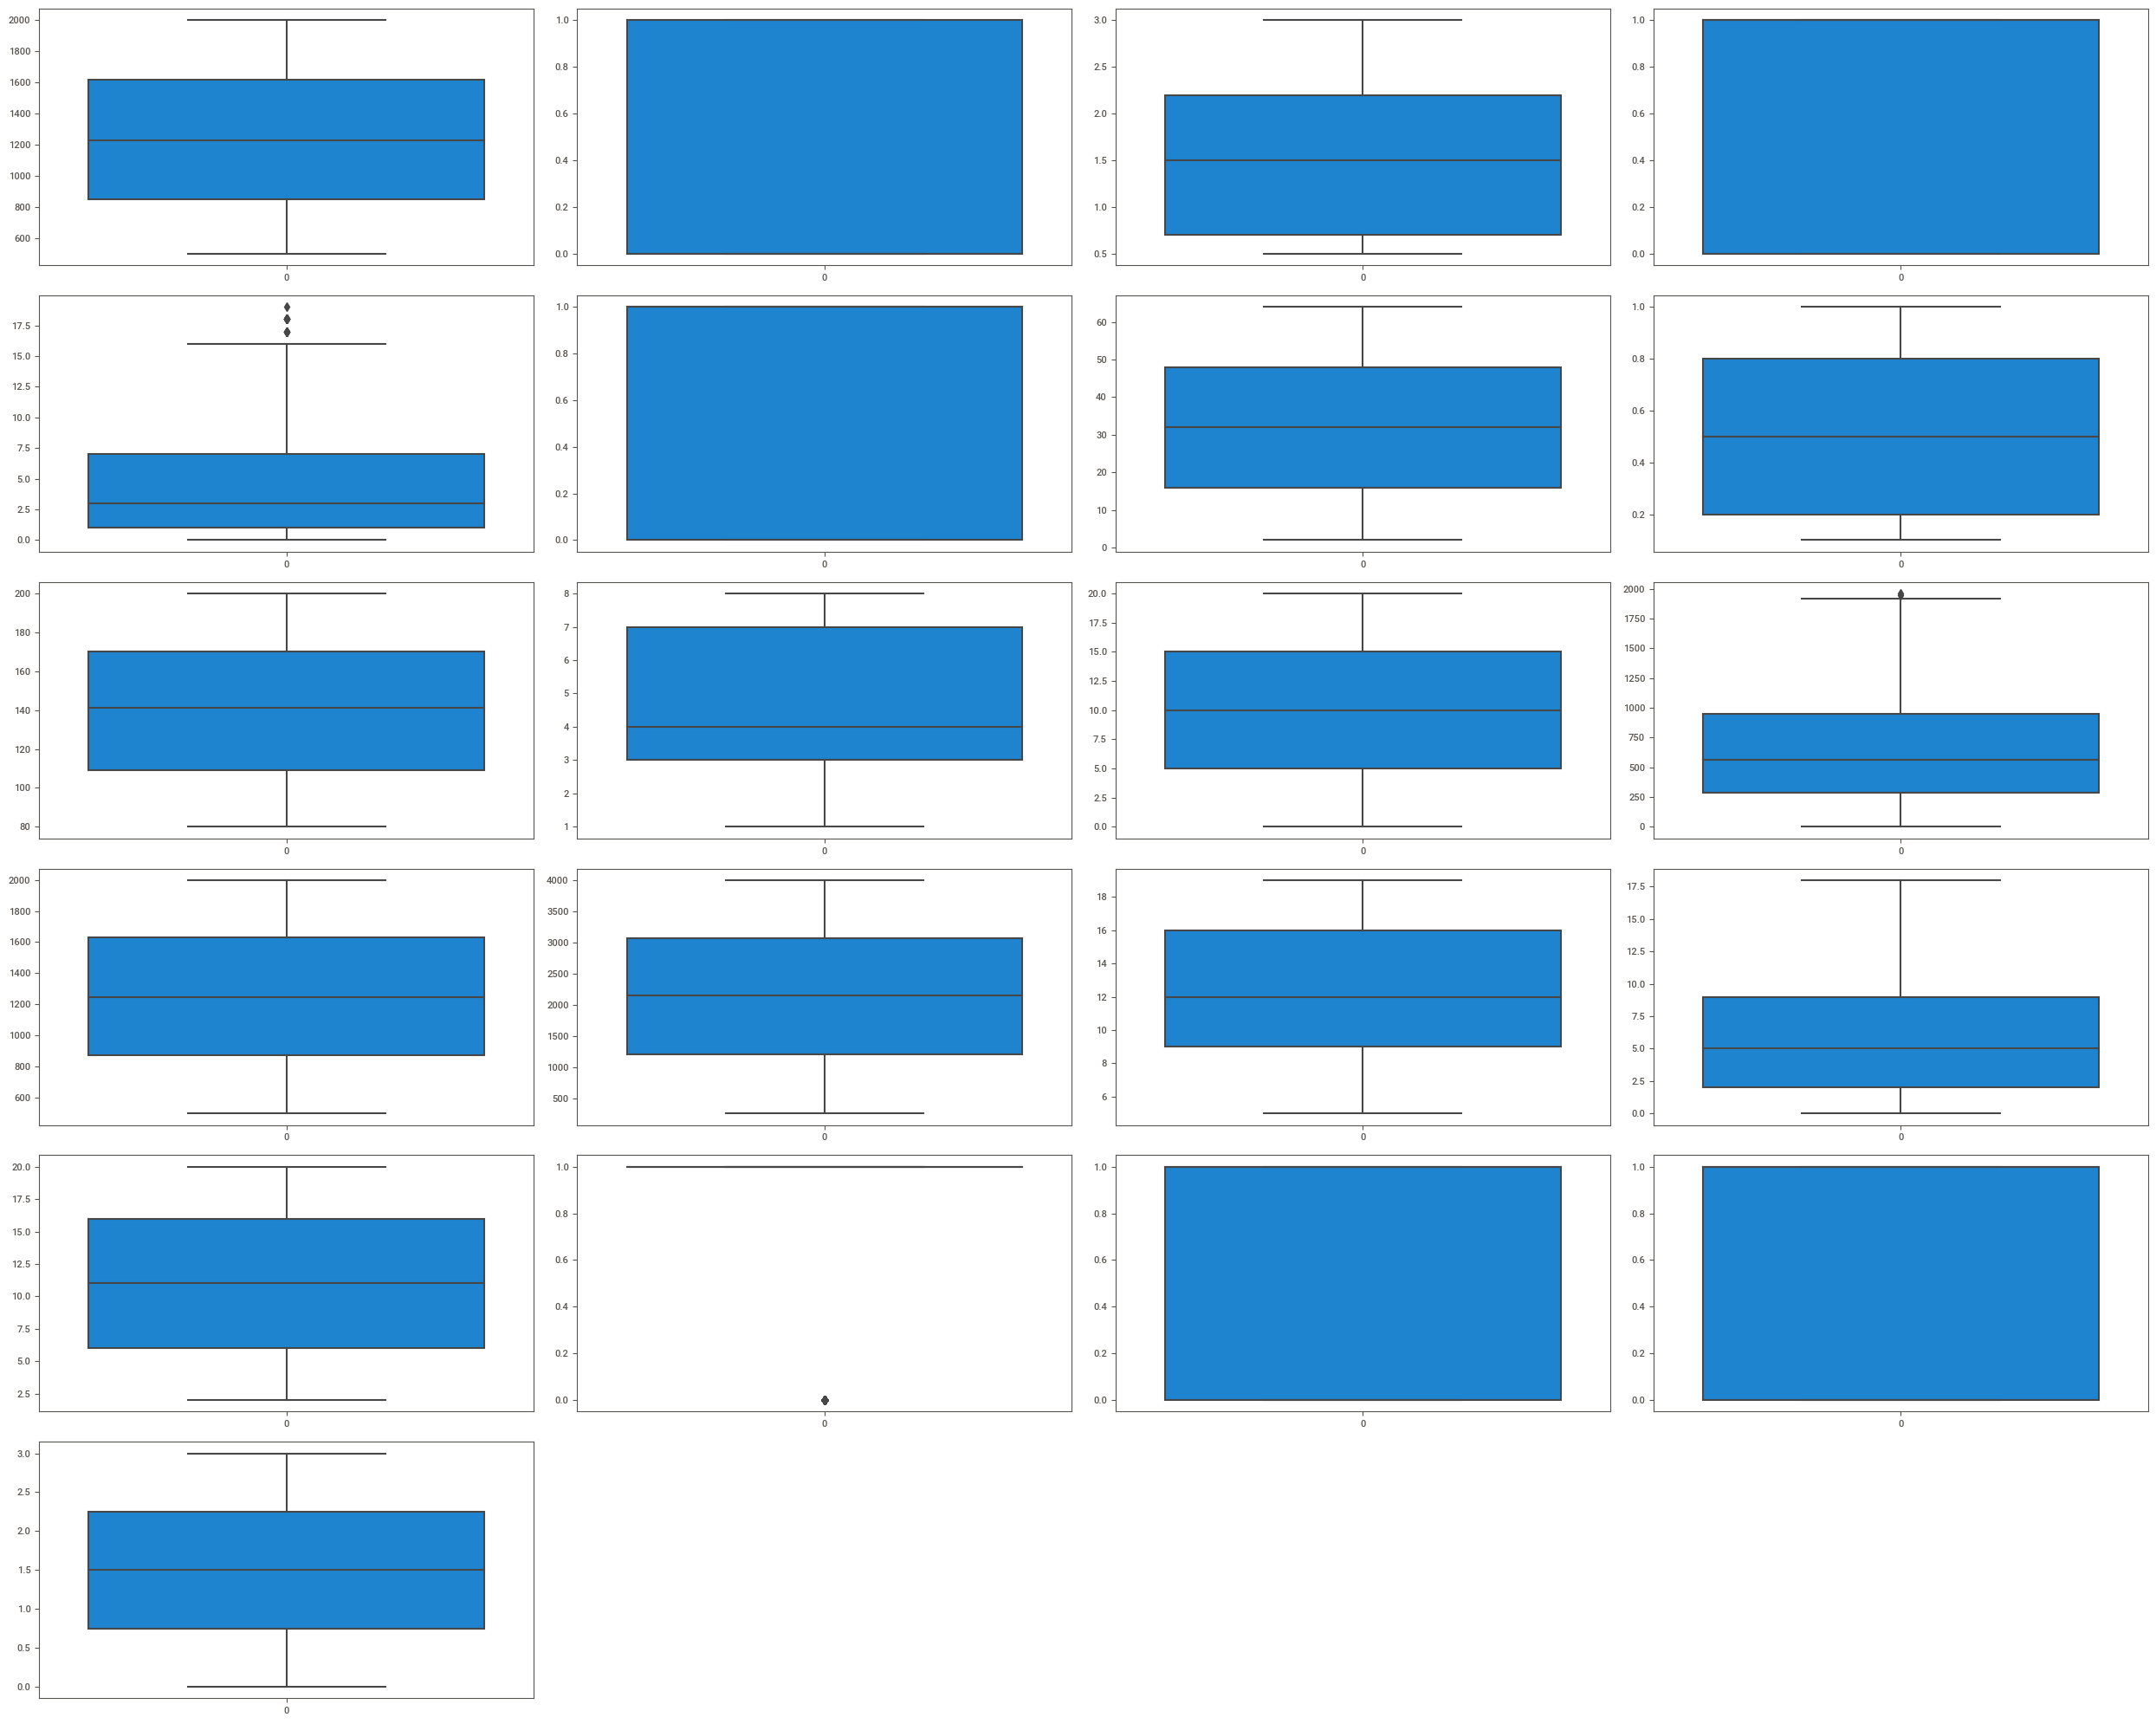

In [16]:
# cheack for outliers
plt.figure(figsize=(25,20),facecolor = "white")
num=1
for columns in df:
    if num <=21:
        ax = plt.subplot(6,4,num)
        sns.boxplot(df[columns])
    num+=1
plt.tight_layout()


### Here are some key insights from the Exploratory Data Analysis (EDA):

- Battery Power: Higher battery power tends to be associated with higher price ranges.
- Clock Speed: Higher clock speeds are observed in higher price ranges.
- Front Camera Megapixels (fc): Higher front camera megapixels are associated with higher price ranges.
- 4G: Presence of 4G (1) is more common in higher price ranges.
- Internal Memory: Higher internal memory is associated with higher price ranges.
- Mobile Weight: Heavier phones tend to be in the higher price ranges.
- Number of Cores: Higher number of cores is associated with higher price ranges.
- Primary Camera Megapixels (pc): Higher primary camera megapixels are associated with higher price ranges.
- Pixel Height and Width: Higher pixel resolution (both height and width) is observed in higher price ranges.
- RAM: Higher RAM is strongly associated with higher price ranges.
- Screen Height (sc_h) and Width (sc_w): Larger screen sizes are found in higher price ranges.
- Talk Time: Longer talk times are associated with higher price ranges.
- there are no outliers

In [17]:
# combine screen height and width to form a single feature scree size and convert from cms to inches
# as we generally understand screen size as screen width x screen height 
df['sc_size']= round(df['sc_h'] * df['sc_w'] / 2.54, 2)
df.drop(columns=['sc_h', 'sc_w'], inplace = True)

In [18]:
# combine pixel width and pixel height to form a single feature pixels
df['pixels'] = df['px_height'] * df['px_width']
df.drop(['px_height', 'px_width'], axis = 1, inplace=True)

In [19]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,24.80,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,20.08,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,8.66,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,50.39,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,6.30,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0,20.47,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2,43.31,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,3.54,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0,70.87,225120


## Feature selection

<function matplotlib.pyplot.show(close=None, block=None)>

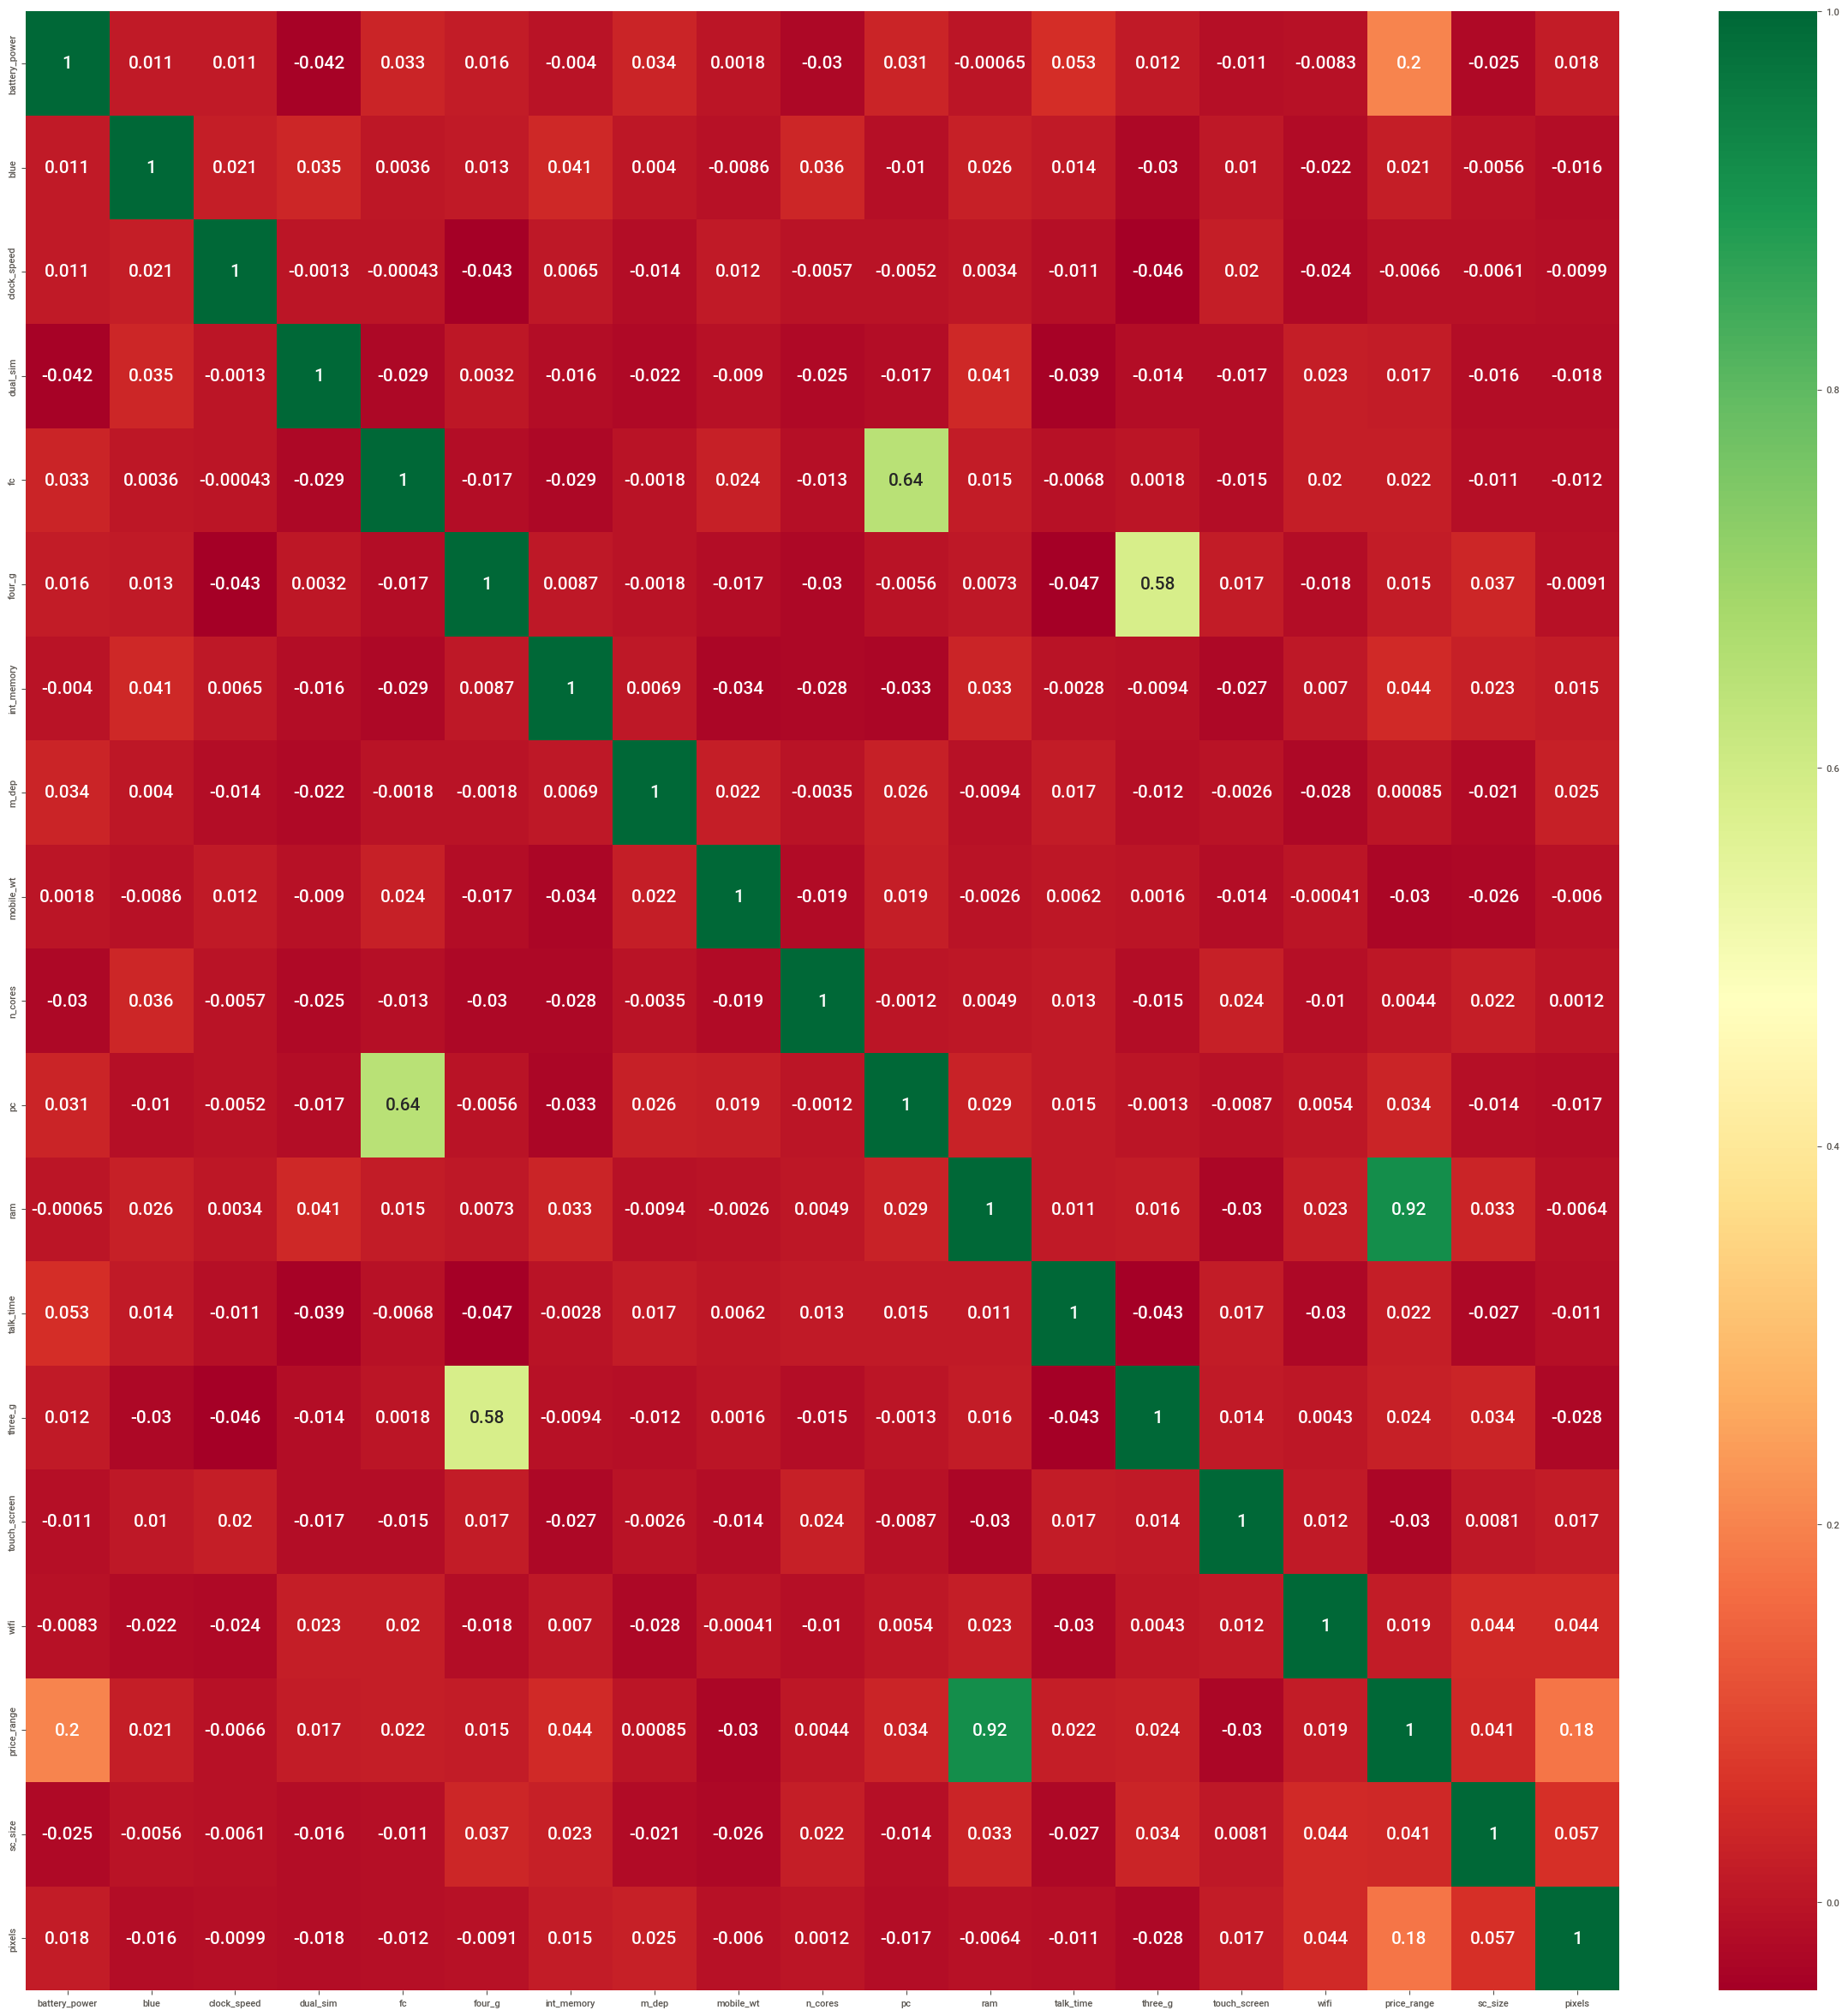

In [20]:
# check correlation
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show

In [21]:
# create dependent and independent variable
y = df.price_range # dependent variable
x = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'sc_size', 'pixels']] # independent variable
#x = list(set(data.columns.tolist()) - {y})

In [22]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_size,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,24.80,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,20.08,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,8.66,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,50.39,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,6.30,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,20.47,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,43.31,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3.54,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,70.87,225120


In [23]:
# create training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [24]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Creation

### Decision Tree

In [25]:
# Model creation using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # object creation
dt.fit(x_train, y_train) # training the model

DecisionTreeClassifier()

In [26]:
# Predict the model
y_pred = dt.predict(x_test)

In [27]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

#check accuracy score
print('Accuracy Score : ', accuracy_score(y_test,y_pred))

Accuracy Score :  0.808


In [28]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[113,  19,   0,   0],
       [  8,  93,  17,   0],
       [  0,  19,  86,  15],
       [  0,   0,  18, 112]])

In [29]:
# generate classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       132
           1       0.71      0.79      0.75       118
           2       0.71      0.72      0.71       120
           3       0.88      0.86      0.87       130

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



### SVM

In [30]:
# model creation using SVM classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [31]:
# prediction using SVC
y_pred = svc.predict(x_test)

In [32]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.842

In [33]:
# generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       132
           1       0.76      0.80      0.78       118
           2       0.76      0.78      0.77       120
           3       0.92      0.88      0.90       130

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [34]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[120,  12,   0,   0],
       [ 11,  94,  13,   0],
       [  0,  17,  93,  10],
       [  0,   0,  16, 114]])

In [35]:
# train tuned model
svmTuned = SVC(C=100, gamma='scale', kernel='linear')
svmTuned.fit(x_train, y_train)

SVC(C=100, kernel='linear')

In [36]:
# predict tuned model with test data
y_pred = svmTuned.predict(x_test)

In [37]:
# check accuracy score
print('Accuracy score : ', accuracy_score(y_test, y_pred))

Accuracy score :  0.928


### Random Forest

In [38]:
# Model creation using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
# prediction
y_pred = rf.predict(x_test)

In [40]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.86

In [41]:
# generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.80      0.84      0.82       118
           2       0.80      0.76      0.78       120
           3       0.89      0.91      0.90       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [42]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[122,  10,   0,   0],
       [  8,  99,  11,   0],
       [  0,  14,  91,  15],
       [  0,   0,  12, 118]])

### Hyperparameter tuning for Random Forest

In [43]:
# tuning using RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

# initialize parameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

# dictionary for hyperparameters
random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features,
              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring = 'accuracy', param_distributions = random_grid, n_iter=100,
                          cv = 3, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(rf_best_params)

/Users/jeetpatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jeetpatel/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jeetpatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/jeetpatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraint

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [44]:
# Pass best parameters to Random forest classifier
rf_clf1 = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 70, bootstrap= False)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_split=5,
                       n_estimators=800)

In [45]:
y_predcv = rf_clf1.predict(x_test)
accuracy_score(y_test, y_predcv)

0.876

### Logistic Regression

In [46]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
logRgr = LogisticRegression()
logRgr.fit(x_train, y_train)

LogisticRegression()

In [47]:
# prediction using test data
y_pred = logRgr.predict(x_test)

In [48]:
# check accuracy score
accuracy_score(y_test, y_pred)

0.912

In [49]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.87      0.92      0.89       118
           2       0.89      0.84      0.87       120
           3       0.92      0.95      0.93       130

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [50]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[124,   8,   0,   0],
       [  5, 108,   5,   0],
       [  0,   8, 101,  11],
       [  0,   0,   7, 123]])

In [51]:
importances = rf.feature_importances_
importances

array([0.08278663, 0.00766251, 0.02994707, 0.00785663, 0.02816993,
       0.00666174, 0.04378076, 0.0267232 , 0.04325044, 0.02595338,
       0.03221742, 0.49646195, 0.03269147, 0.00658497, 0.00803569,
       0.00709351, 0.03962322, 0.07449949])

In [52]:
indices = np.argsort(importances)
indices

array([13,  5, 15,  1,  3, 14,  9,  7,  4,  2, 10, 12, 16,  8,  6, 17,  0,
       11])

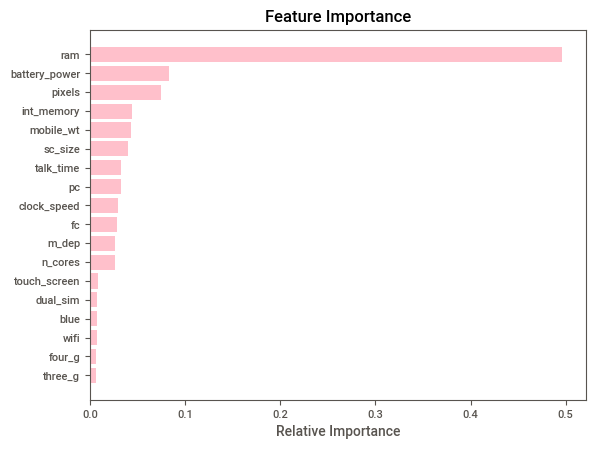

In [53]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Conclusion

### Model comparison report

- Below is the report of various models trained and their accuracy score:

- Decision Tree - 82%
- SVM - 84%
- SVM Tuned - 93%
- Random Forest - 86%
- Random Forest tuned - 87%
- Logistic - 91%

We can see that SVM tuned with GridSearch and Logistic Regression give better accuracy score than others.

### Feature Importance report

We can see that RAM is the most important feature that drives the price along with other specifications such as battery power, pixels, weight, internal memory and screen size. The focus on these factors would drive the sales of the cellphones.

### Other major observations:
- There is an increase in battery power as the price increases.
- Mobile weight is less for high range phones.
- Phones with high RAM will have higher prices.
- RAM, battery power and pixels play a major role in deciding the price range of mobile phones.
- Bluetooth is supported by half of the cellphones
- 50% of the cellphones have wifi support.